### Imports

In [189]:
#carga de datos y tratamiento de los mismos
import pandas as pd
import numpy as np

#transformación de datos
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler,LabelEncoder

#tablas y dibujos
import matplotlib.pyplot as plt
import seaborn as sns

#modelos
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#test y métricas

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

#miscelaneos
import random

### Carga de datos

In [190]:
FILAS_EJEMPLO=3
RUTA="./PruebaConcepto2024/dementia_dataset.csv"
DEBUG=False
datos=pd.read_csv(RUTA)

if DEBUG:
    display (datos.head(n=FILAS_EJEMPLO)) 
    #mostramos el número de filas y columnas existentes
    display("Filas existentes",datos.index.size, "Columnas existentes", datos.columns.size)

### Comprobación de datos

In [191]:
if DEBUG:
    display (datos.head(n=FILAS_EJEMPLO)) 

    display("Filas existentes",datos.index.size, "Columnas existentes", datos.columns.size)

    for i in datos.columns:
            display(f"columna= {i}" ,datos[i].unique())



#vemos los datos que son nulos (por si se puede solucionar)
if datos.isnull().sum().any() > 0:
    display("lista de nulos",datos.isnull().sum())
    display("pre tratados " ,datos[datos.isnull().any(axis=1)])

'lista de nulos'

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

'pre tratados '

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


### Tratamiento de datos

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_0,Group_1,Group_2
0,0,1,0,1,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1.0,0.0,0.0
1,0,2,457,1,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876,1.0,0.0,0.0
2,2,1,0,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0.0,0.0,1.0


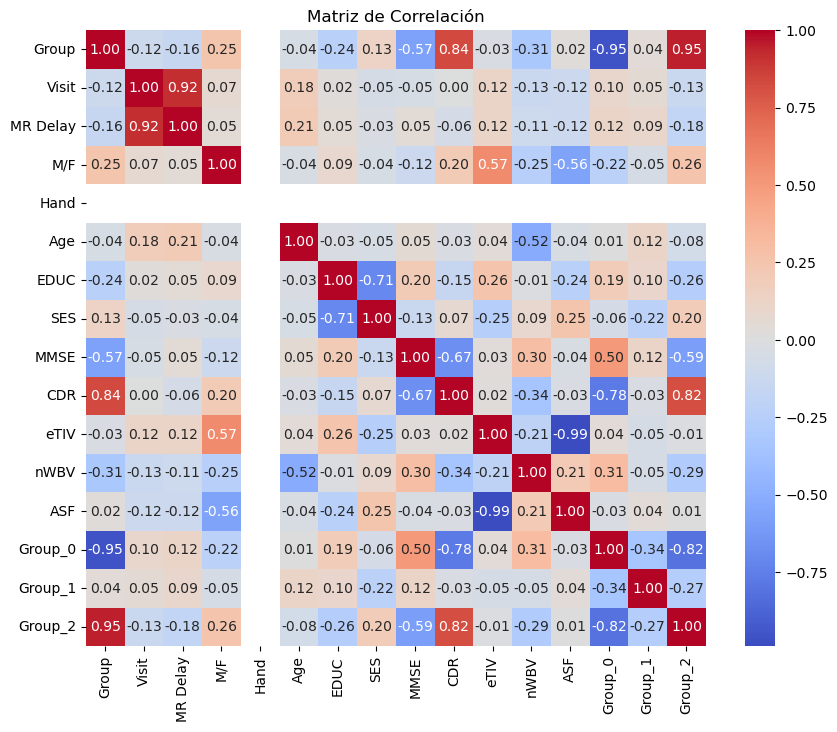

In [192]:
#eliminar filas con nulos
if(False):
    datos.dropna(axis=0)


if(True):#cambiamos el valor de las variables por otras que nos convengan mas 

    datos["Group"]=datos["Group"].map({
        "Nondemented":0,
        "Converted":1,
        "Demented":2
    })

    le= LabelEncoder()
    datos["M/F"]    = le.fit_transform( datos["M/F"])
    datos["Hand"]   = le.fit_transform(datos["Hand"])

if(True):
    #rellenamos con la moda de los valores
    
    datos= datos.fillna(datos['SES'].mean())

    #rellenamos con la mediana de los valores

    datos= datos.fillna(datos['MMSE'].median())

if(True):#escalamos los datos de 0 a 1
    scaler =MinMaxScaler(feature_range=(0,1))
    columnas_scaler=[
        #"MR Delay",
        #"Age", 
        #"EDUC",
        #"SES",
        #"MMSE",
        #"CDR",
        #"eTIV",
        #"nWBV",
        #"ASF"
        ]
    for i in columnas_scaler:
        datos[i]= scaler.fit_transform(datos[[i]]) #ojo, doble corchete

if(True):#Pasamos los valores a one hot encoder cuando son 3 o mas valores posibles
    encoder = OneHotEncoder(sparse_output=False)

    array= ["Group"]

    for i in array:
        aux_HOT= encoder.fit_transform(datos[i].to_numpy().reshape(-1,1))

        column_names = encoder.get_feature_names_out([i])

        datos=pd.concat([datos, pd.DataFrame(aux_HOT,columns=column_names,index=datos.index)],axis=1)
        if(False):#borramos la columna al tratarla
            datos=datos.drop(i,axis=1)

if(True):
    datos = datos.drop_duplicates()

if(True):
    columnas_borrar=["Subject ID", "MRI ID"]
    for i in columnas_borrar:
        datos.drop(columns=i,inplace=True)

display(datos.head(FILAS_EJEMPLO))

if datos.isnull().sum().any() > 0:
    display("lista de nulos",datos.isnull().sum())
    display("pre tratados " ,datos[datos.isnull().any(axis=1)])

#correlación entre las variables
correlation_matrix =datos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Datos comunes para modelos

In [193]:
TAM_ENTRENAMIENTO=0.8
SEMILLA=42

target= datos[["Group_0","Group_1","Group_2"]].idxmax(axis=1)
#target= datos["Group"]
X=datos.drop(columns=["Group_0","Group_1","Group_2","Group"])
X2= datos[["CDR","SES","EDUC","MR Delay"]]
x_train, x_test, y_train, y_test = train_test_split(X2, target, train_size = TAM_ENTRENAMIENTO, random_state = SEMILLA,shuffle=False)

y_train_DT= y_train_RT=y_train

print(f"tamaño de los datos de entrenamiento:{x_train.shape}")
print(f"tamaño de los datos de test:{x_test.shape}")

tamaño de los datos de entrenamiento:(298, 4)
tamaño de los datos de test:(75, 4)


<h1>Árbol de decisiones<h1/>

In [ ]:
if(False):
    #probamos diferentes hiper parámetros
    params = {
        "max_depth": [3, 5, 10, 20, None],
        "max_features":['auto','sqrt','log2'],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4, 8,16],
        "criterion": ["gini", "entropy","log_lost"]
    }

    arbol=DecisionTreeClassifier(random_state=SEMILLA)
    grid = GridSearchCV(arbol, params, cv=5)
    grid.fit(x_train, y_train_DT)

    #conseguimos los mejores
    print(f"Mejores parámetros: {grid.best_params_}")
    y_pred_grid = grid.predict(x_test)
    #vemos el mayor fit conseguido
    print(f'Acuraccy optimizado: {accuracy_score(y_test, y_pred_grid)}')
    print(confusion_matrix(y_test, y_pred_grid))

#nos quedamos con el mejor modelo posible

dtClass = DecisionTreeClassifier(criterion="gini",max_depth=3,max_features= 'sqrt',min_samples_leaf=4, min_samples_split=2,random_state=SEMILLA,class_weight={"Group_0":1 ,"Group_1":0.8, "Group_2":1})
dtClassFit = dtClass.fit(x_train, y_train_DT)
Y_DT = dtClassFit.predict(x_test)

if(False): #mostrar la predicción
    print(Y_DT)

print(f'Acuraccy: {accuracy_score(y_test, Y_DT)}')
print(confusion_matrix(y_test, Y_DT))
print(f'Semilla={SEMILLA}')


Acuraccy: 0.9466666666666667
[[38  0  0]
 [ 2  0  2]
 [ 0  0 33]]
Semilla=42


<h1>Árbol Aleatorio</h1>

In [199]:
#probamos los diferentes hiper parámetros

if(False):


    arbol_RT=RandomForestClassifier(n_jobs=-1,random_state=SEMILLA)

    params = {
        "n_estimators":[100,200,300],
        "criterion": ["gini", "entropy","log_loss"],
        "max_depth": [3, 5, 10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4, 8,16],
        "max_features":['sqrt','log2'],
        "min_weight_fraction_leaf": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
        "min_impurity_decrease":[0,0.1,0.25,0.5]
        #"class_weight":[{"Group_0":1 ,"Group_1":0.8, "Group_2":1},{"Group_0":1 ,"Group_1":1, "Group_2":1}],
        #"ccp_alpha":[0,0.2,0.4,0.6,0.8,1]
    }

    random_search = RandomizedSearchCV(
        estimator=arbol_RT,
        param_distributions=params,
        n_iter=50,  # prueba con 50 combinaciones
        cv=5,
        scoring='accuracy',
        verbose=1,
        random_state=SEMILLA,
        refit=True,
        n_jobs=-1
    )
    random_search.fit(x_train, y_train)
    print("Mejores parámetros")
    print(random_search.best_params_)
    print(random_search.best_score_)

dtClass = RandomForestClassifier(n_jobs=-1,n_estimators=300,criterion="log_loss",max_depth=3,max_features='log2',min_samples_leaf=8,min_samples_split=2,min_weight_fraction_leaf=0.01,random_state=SEMILLA,class_weight={"Group_0":1 ,"Group_1":0.1, "Group_2":1})
dtClassFit = dtClass.fit(x_train, y_train_RT)
Y_RT = dtClassFit.predict(x_test)

print(f'Acuraccy: {accuracy_score(y_test, Y_RT)}')
print(confusion_matrix(y_test, Y_RT))
print(f"Semilla={SEMILLA}")

Acuraccy: 0.9466666666666667
[[38  0  0]
 [ 2  0  2]
 [ 0  0 33]]
Semilla=42


<h1>KNN</h1>

In [196]:

if(False):

    KNN_TEST=KNeighborsClassifier(n_jobs=-1)

    params = {
        "n_neighbors":[3,5,7,9],
        "weights":['uniform','distance'],
        "algorithm":['auto', 'ball_tree','kd_tree','brute'],
        "leaf_size":[10,30,60],
        "p":[1,2]
    }

    random_search = RandomizedSearchCV(
        estimator=KNN_TEST,
        param_distributions=params,
        n_iter=50,  # prueba con 50 combinaciones
        cv=3,
        scoring='accuracy',
        verbose=1,
        random_state=SEMILLA,
        refit=True,
        n_jobs=-1
    )
    random_search.fit(x_train, y_train)
    print("Mejores parámetros")
    print(random_search.best_params_)
    print(random_search.best_score_)

knn=KNeighborsClassifier(
    n_neighbors=3,
    weights="uniform",
    leaf_size=50,
    algorithm='auto',
    p=1,
    n_jobs=-1,
    
)

knn.fit(x_train,y_train)

Y_KNN=knn.predict(x_test)

print(f'Acuraccy: {accuracy_score(y_test, Y_KNN)}')
print(confusion_matrix(y_test, Y_KNN))
print(f"Semilla={SEMILLA}")



Acuraccy: 0.7066666666666667
[[33  1  4]
 [ 4  0  0]
 [12  1 20]]
Semilla=42


<h1>Multi Layer Perceptron</h1>

In [197]:
if (False):
    param_grid = {
        'hidden_layer_sizes': [
            (16,),
            (32,),
            (64,),
            (32,16),
            (64, 32)
            ],
        'solver':['adam','sgd','lbfgs'],
        'activation':['relu','identity','logistic','tanh'],
        'alpha': [0.00001,0.0001, 0.001, 0.01],
        'max_iter': [300,400,500,1000,2000,4000],
        'early_stopping':[True,False]
    }

    mlp_param = MLPClassifier(random_state=SEMILLA)

    random_search = RandomizedSearchCV(
        estimator=mlp_param,
        param_distributions=param_grid,
        n_iter=100,  # prueba con 50 combinaciones
        cv=5,
        scoring='accuracy',
        verbose=1,
        random_state=SEMILLA,
        refit=False,
        n_jobs=-1
    )
    random_search.fit(x_train, y_train)
    print("Mejores parámetros")
    print(random_search.best_params_)
    print(random_search.best_score_)


mlp = MLPClassifier(solver= 'lbfgs', max_iter = 5000, hidden_layer_sizes= (16,4), early_stopping= True, alpha= 0.0001, activation= 'identity', random_state=SEMILLA)
mlp.fit(x_train, y_train)
Y_MLP = mlp.predict(x_test)

print(f'Precisión: {accuracy_score(y_test, Y_MLP)}')
print("Matriz de confusión:\n", confusion_matrix(y_test, Y_MLP))
print(f"Semilla:{SEMILLA}")

Precisión: 0.9333333333333333
Matriz de confusión:
 [[38  0  0]
 [ 2  2  0]
 [ 0  3 30]]
Semilla:42


<h1>Comparación de resultados</h1>

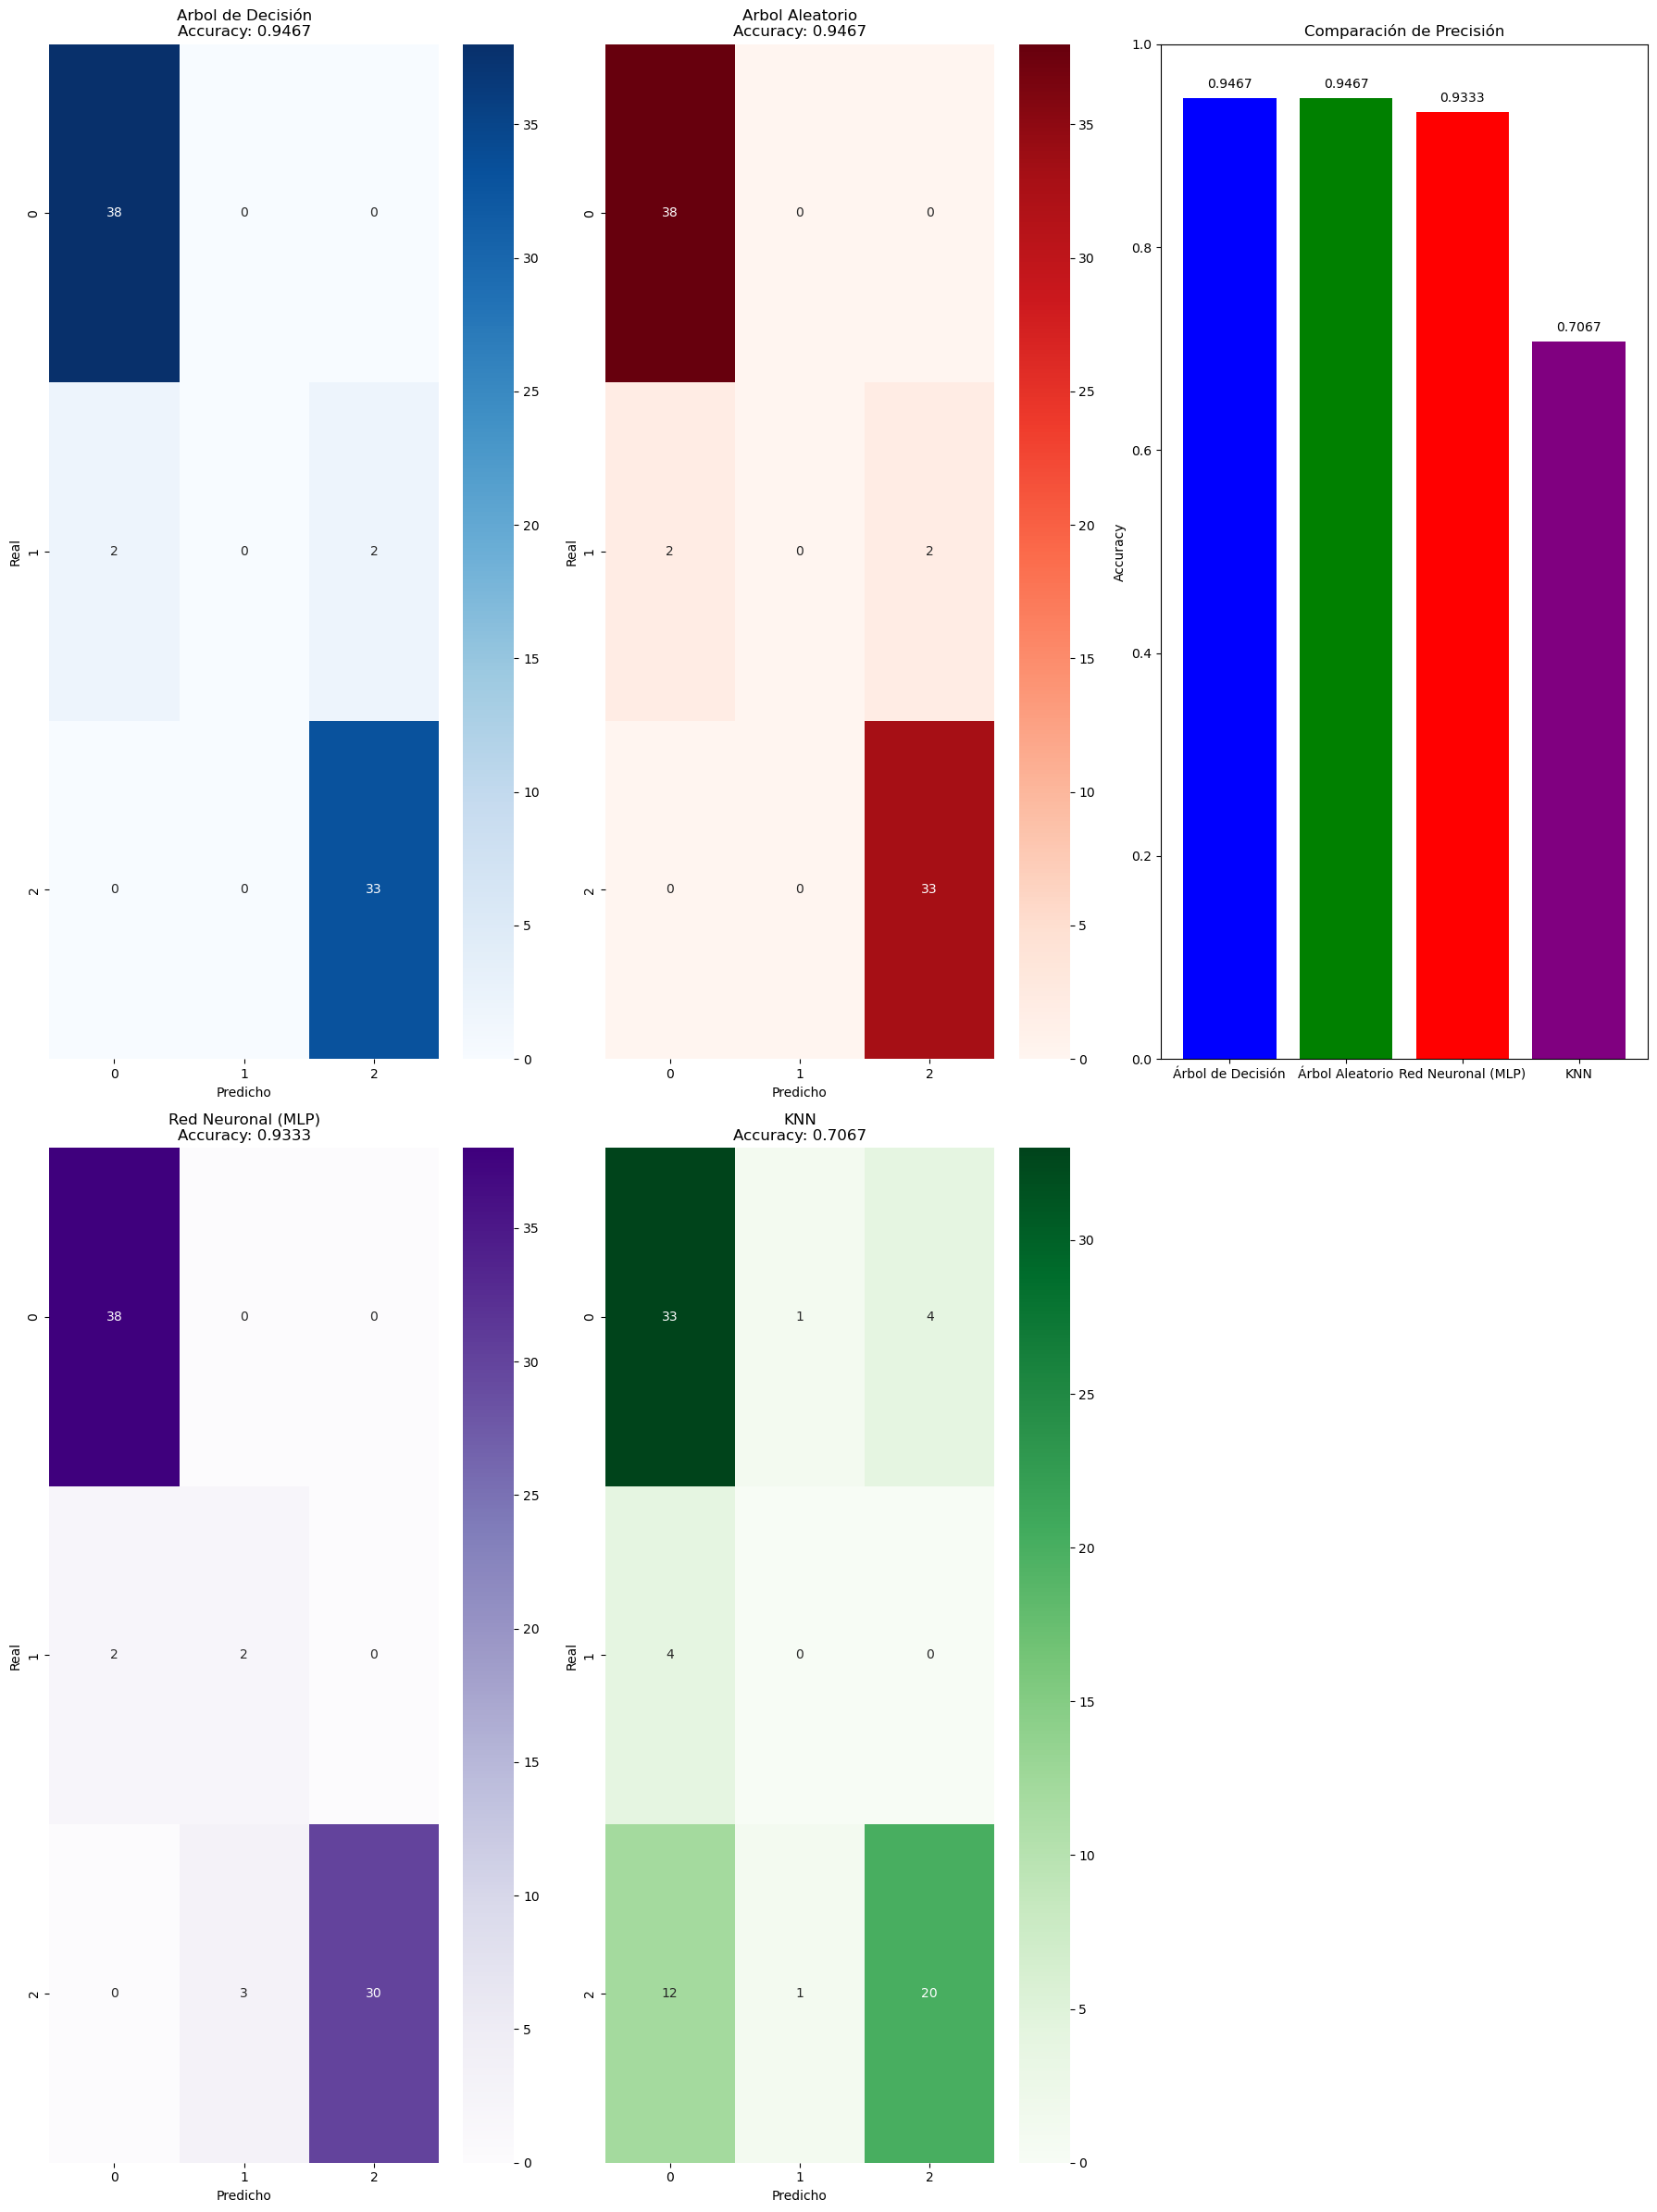

In [198]:
# Calcular matrices de confusión
cm_dt = confusion_matrix(y_test, Y_DT)
cm_rt = confusion_matrix(y_test, Y_RT)
cm_knn = confusion_matrix(y_test, Y_KNN)
cm_mlp = confusion_matrix(y_test, Y_MLP)

# Calcular accuracies
ACC_dt =accuracy_score(y_test, Y_DT)
ACC_rt =accuracy_score(y_test, Y_RT)
ACC_knn =accuracy_score(y_test, Y_KNN)
ACC_mlp =accuracy_score(y_test, Y_MLP)

# Crear gráfico de matrices de confusión

FILAS=2
COLUMNAS=3

fig, axes = plt.subplots(FILAS, COLUMNAS, figsize=(18, 24))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0][0])
axes[0][0].set_title(f'Arbol de Decisión\nAccuracy: {ACC_dt:.4f}')
axes[0][0].set_xlabel('Predicho')
axes[0][0].set_ylabel('Real')

sns.heatmap(cm_rt, annot=True, fmt='d', cmap='Reds', ax=axes[0][1])
axes[0][1].set_title(f'Arbol Aleatorio\nAccuracy: {ACC_rt:.4f}')
axes[0][1].set_xlabel('Predicho')
axes[0][1].set_ylabel('Real')

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Purples', ax=axes[1][0])
axes[1][0].set_title(f'Red Neuronal (MLP)\nAccuracy: {ACC_mlp:.4f}')
axes[1][0].set_xlabel('Predicho')
axes[1][0].set_ylabel('Real')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', ax=axes[1][1])
axes[1][1].set_title(f'KNN\nAccuracy: {ACC_knn:.4f}')
axes[1][1].set_xlabel('Predicho')
axes[1][1].set_ylabel('Real')

# Crear gráfico de barras con accuracy
modelos = ['Árbol de Decisión','Árbol Aleatorio', 'Red Neuronal (MLP)','KNN']
scores = [ACC_dt, ACC_rt,ACC_mlp,ACC_knn]

axes[0][2].bar(modelos, scores, color=['blue', 'green','red','purple'])
axes[0][2].set_ylim(0, 1)
axes[0][2].set_ylabel('Accuracy')
axes[0][2].set_title('Comparación de Precisión')

for i, v in enumerate(scores):
    axes[0][2].text(i, v + 0.01, f"{v:.4f}", ha='center')

axes[1][2].axis('off')

plt.tight_layout()
plt.show()